# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju Korogi Oliveira e Gabriel Limas Nunes
### **Matrículas:**  2021032110 e 2021032048


### **Tema:** Aluguel de Apartamentos no EUA
### **Base de dados:** https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified


In [1]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score,  calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# **Introdução**

Neste trabalho, analisamos um banco de dados de apartamentos disponíveis para aluguel nos Estados Unidos, buscando entender as tendências de mercado e os principais fatores colaborantes para a decisão do preço final de aluguel do imóvel.


O banco de dados é formado por 100000 apartamentos disponíveis para aluguel nos EUA, possuindo o preço do aluguel e diversos atributos do apartamento como localização, número de quartos, número de banheiros, entre outros.


O ChatGPT foi escolhido como ferramenta para auxiliar na análise dos dados, permitindo a criação de códigos e aplicação de algoritmos com maior facilidade, além de nos permitir analisar o desempenho da ferramenta automatizada nas diferentes etapas de CRISP.

# **Motivação**

A principal motivação desse projeto é o melhor entendimento das características que afetam o preço de aluguel de um apartamento, permitindo possivelmente a criação de ferramentas que auxilie na busca por apartamentos ao possibilitar a pesquisa em uma faixa de preço específico definindo atributos desejados no imóvel, além de auxiliar proprietários a estimar um valor adequado para um apartamento com base em suas características.

# **Objetivo**

## **Geral**


O objetivo deste trabalho é clusterizar apartamentos com base nos seus atributos e utilizar esses clusters para realizar uma análise de
mercado, identificando quais atributos são mais relevantes para o preço do aluguel, além de reconhecer quais atributos estão mais fortemente
relacionados.

## **Específicos**

Ainda não sei ainda, a gnt coloca com base nos resultados

# **Metodologia**

Realizar a clusterização de um dataset envolve múltiplos passos, anteriores a criação dos clusters. 


Primeiramente, é necessário adquirir o dataset apropriado para esse projeto e entender quais são os dados presentes nele e o que representam. 


Em seguida, precisamos realizar um pré-processamento dos dados, em que o dataset é limpo e normalizado, com o objetivo de evitar erros e bias, e é preparado para a aplicação de algoritmos de aprendizado de máquina não supervisionados.


Uma vez que o processo de limpeza e normalização foi realizado, podemos começar o processo de criação de cluster utilizando diferentes métodos como k-means, clusterização hierarquica etc. Com os clusters criados podemos identificar as matrizes dos diferentes clusters.


Para identificar o número de clusters apropriado para nossa análise utilizamos a técnica de Within Sum of Squares(WSS), garantindo que temos um número ótimo de clusters antes de seguirmos para a criação de um modelo.

Possuindo o dataset clusterizado, é possível entender os comportamentos e traços dos diferentes clusters com base no padrão de compra, comportamento e outros atributos.



# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


### Informações Básicas

In [3]:
#Carregando a base de dados
df = pd.read_csv('./100k.csv', delimiter=';', encoding='utf-8')

/tmp/ipykernel_11988/2177396325.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./100k.csv', delimiter=';', encoding='utf-8')


In [4]:
df.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [6]:
print(df.describe())

                 id     bathrooms      bedrooms         price   square_feet  \
count  9.949200e+04  99429.000000  99368.000000  99491.000000  99492.000000   
mean   5.358321e+09      1.445323      1.728212   1527.057281    956.430688   
std    1.847404e+08      0.547021      0.749200    904.245882    417.571522   
min    5.121046e+09      1.000000      0.000000    100.000000    101.000000   
25%    5.197950e+09      1.000000      1.000000   1013.000000    729.000000   
50%    5.508673e+09      1.000000      2.000000   1350.000000    900.000000   
75%    5.509007e+09      2.000000      2.000000   1795.000000   1115.000000   
max    5.669439e+09      9.000000      9.000000  52500.000000  50000.000000   

           latitude     longitude          time  
count  99467.000000  99467.000000  9.949200e+04  
mean      36.947988    -91.568656  1.559665e+09  
std        4.599461     15.817168  1.105077e+07  
min       19.573800   -159.369800  1.544174e+09  
25%       33.746500   -104.791900  1.5

### Gráficos para melhor entendimento dos atributos

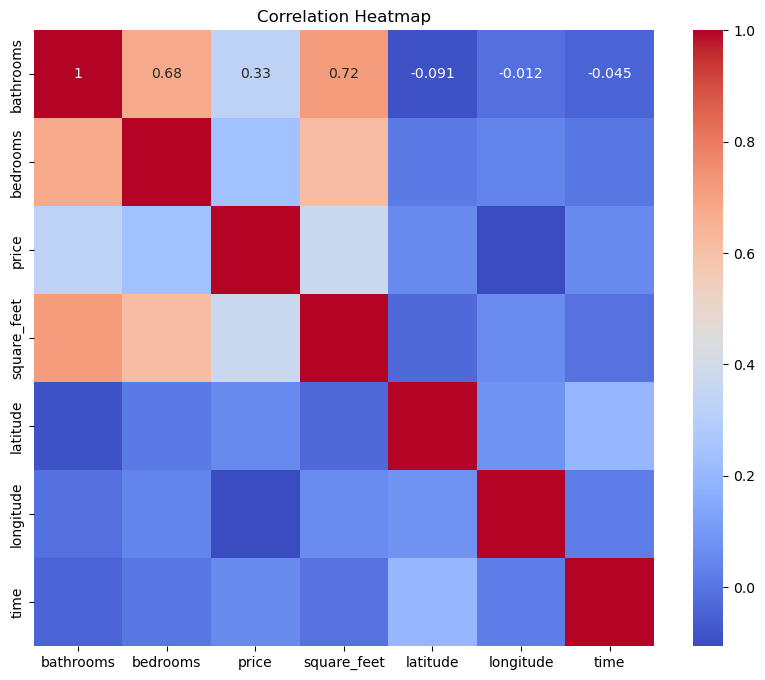

In [7]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Create a correlation heatmap for numerical columns
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


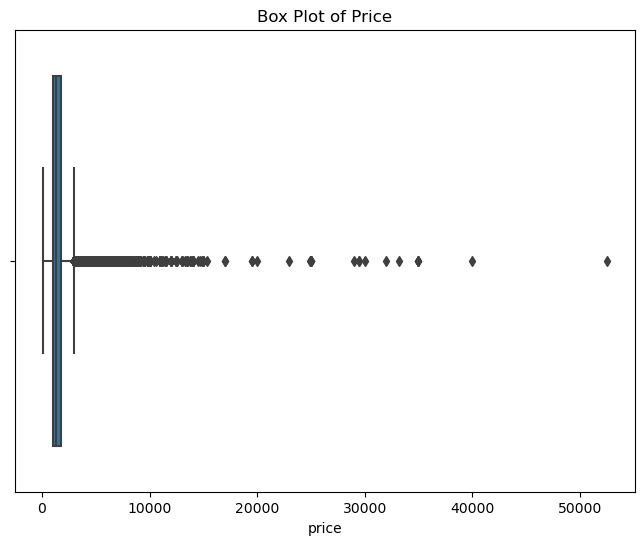

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Price')
plt.show()

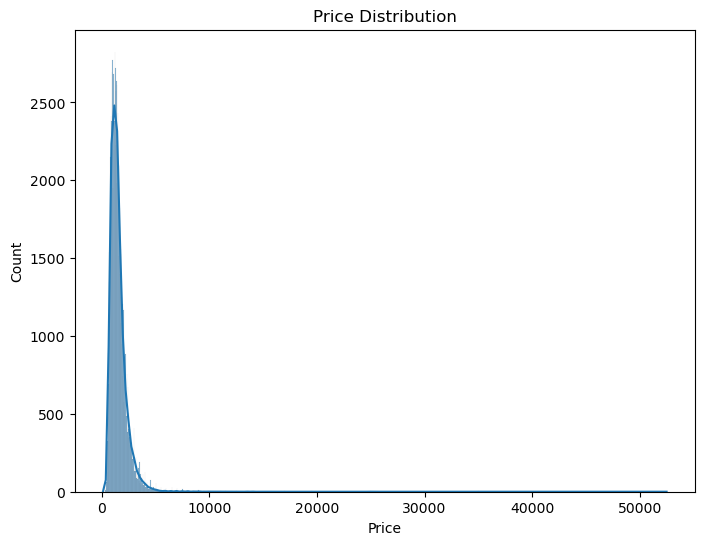

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

In [10]:
print((df['price'] > 5000).sum())

477


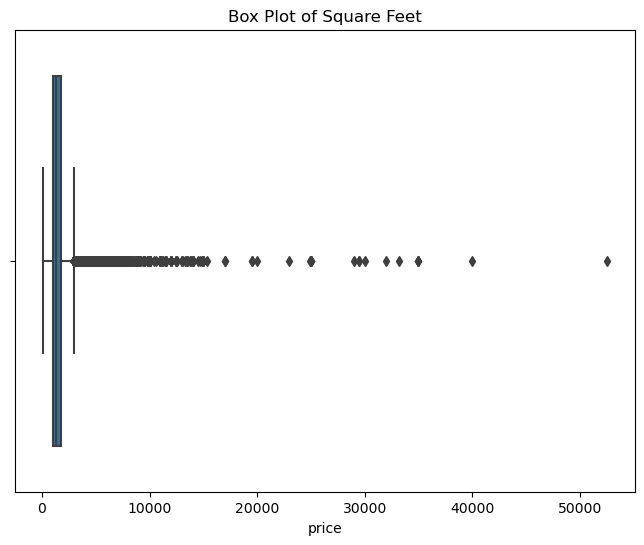

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Square Feet')
plt.show()

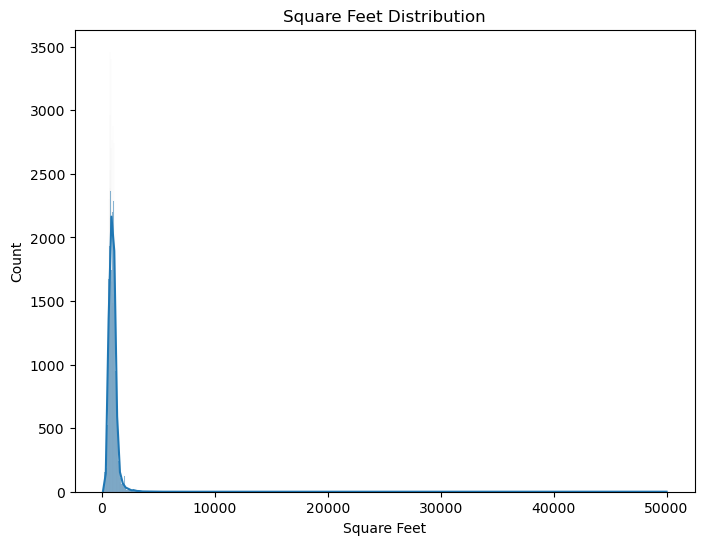

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['square_feet'], kde=True)
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.show()

In [13]:
print((df['square_feet'] > 2500).sum())

672


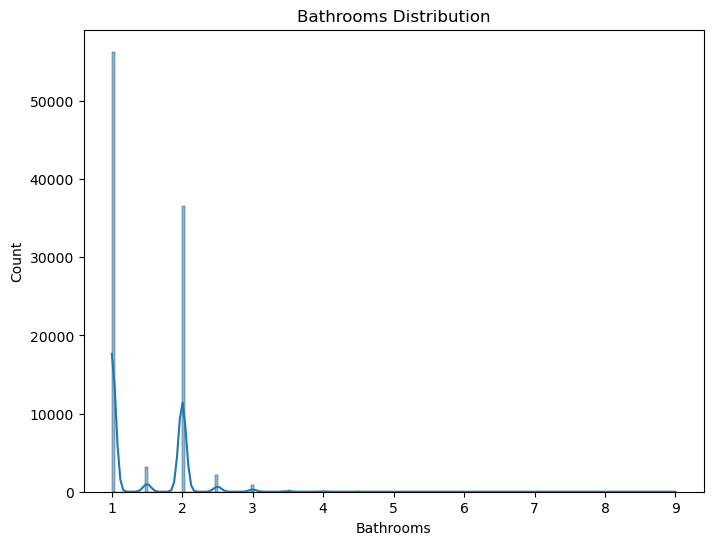

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.show()

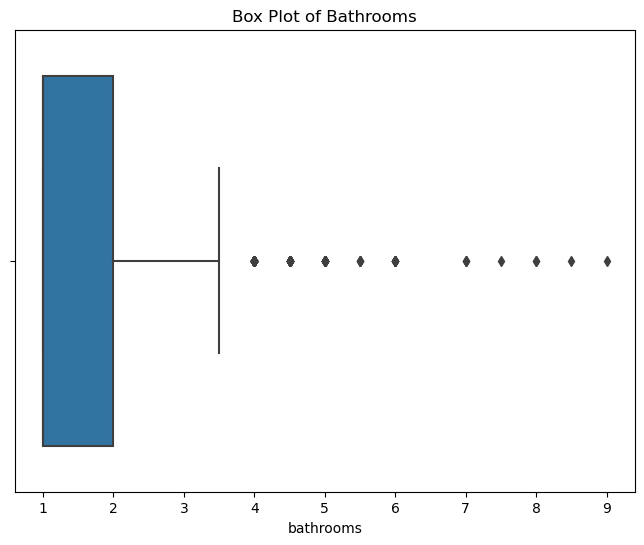

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', data=df)
plt.title('Box Plot of Bathrooms')
plt.show()

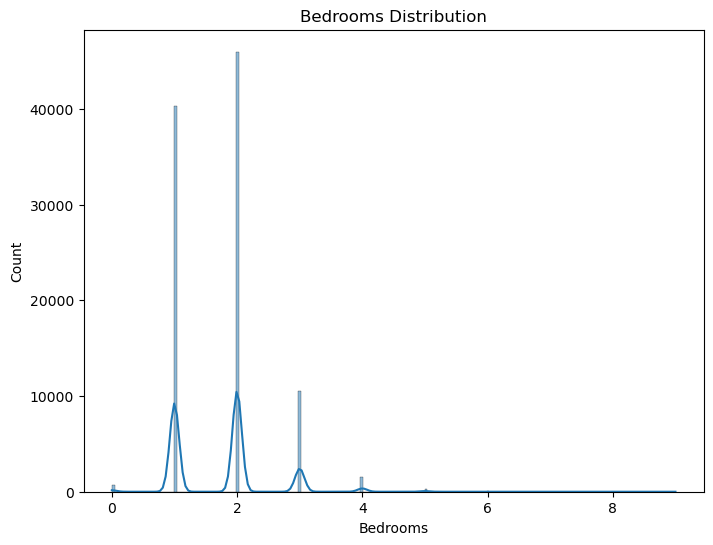

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.show()

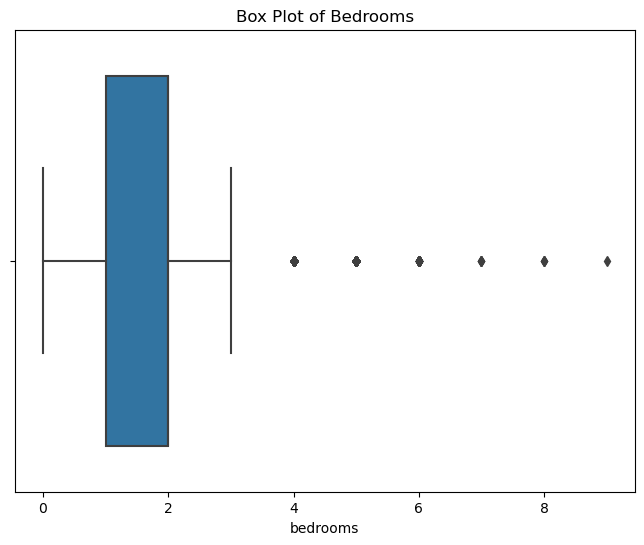

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedrooms', data=df)
plt.title('Box Plot of Bedrooms')
plt.show()

### Análise de atributos categóricos

In [18]:
unique_pets_allowed = df['pets_allowed'].unique()

# Print the unique values
print(unique_pets_allowed)

['Cats' 'Cats,Dogs' nan 'Dogs' 'Cats,Dogs,None']


In [19]:
unique_amenities = df['amenities'].unique()

# Print the unique values
print(unique_amenities)
print(len(unique_amenities))

[nan 'Fireplace,Gym,Parking,Pool,Storage,Wood Floors' 'Gated,Pool' ...
 'Dishwasher,Doorman' 'AC,Elevator,Parking,Patio/Deck,Pool,Washer Dryer'
 'Dishwasher,Doorman,Patio/Deck,Refrigerator,Storage,Washer Dryer,Wood Floors']
9828


In [20]:
combined_amenities = ', '.join(df['amenities'].dropna())

# Split the combined string by commas and create a list of words
word_list = [word.strip() for word in combined_amenities.split(',')]

# Get the unique words by converting the list to a set
unique_words = set(word_list)

# Print the unique words
print(unique_words)
print(len(unique_words))

{'Patio/Deck', 'Gym', 'Pool', 'Dishwasher', 'Refrigerator', 'Cable or Satellite', 'Garbage Disposal', 'Wood Floors', 'Elevator', 'AC', 'Doorman', 'Alarm', 'Golf', 'Fireplace', 'Storage', 'Playground', 'Luxury', 'Hot Tub', 'Parking', 'Basketball', 'Gated', 'View', 'Washer Dryer', 'Internet Access', 'Clubhouse', 'TV', 'Tennis'}
27


In [21]:
# Use the 'cityname' column and apply the value_counts() function to count city frequencies
state_counts = df['state'].value_counts()

# Get the city with the highest frequency
most_frequent_state = state_counts.index[0]

# Get the frequency of the most frequent city
frequency = state_counts.iloc[0]

# Print the most frequent city and its frequency
print(f"The state with the highest frequency is '{most_frequent_state}' with a frequency of {frequency}.")

The state with the highest frequency is 'TX' with a frequency of 11257.


In [22]:
# Use the 'cityname' column and apply the value_counts() function to count city frequencies
city_counts = df['cityname'].value_counts()

# Get the city with the highest frequency
most_frequent_city = city_counts.index[0]

# Get the frequency of the most frequent city
frequency = city_counts.iloc[0]

# Print the most frequent city and its frequency
print(f"The city with the highest frequency is '{most_frequent_city}' with a frequency of {frequency}.")

The city with the highest frequency is 'Dallas' with a frequency of 2858.


## **3. Data preparation (Preparação dos dados)**

### Escolha de colunas e subconjuntos do dataset

In [23]:
missing_values = df.isnull().sum()
print(missing_values)

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64


O grande número de valores "nulos" para as colunas amenities, pets_allowed pode se dever ao fato dessa base de dados indicar valores negativos como nulos. No caso dos pets_allowed, por exemplo, valores do tipo None podem indicar que pets não são permitidos.

In [24]:
# df_filtered = df[df['cityname'] ==  'Dallas']

Só usaremos dados do estado de texas para haver uma padronização

In [25]:
df_filtered = df[df['state'] == 'TX']


Definição de colunas escolhidas

In [26]:
#df_filtered = df_filtered[['square_feet', 'price', 'bathrooms', 'bedrooms', 'amenities']]
df_filtered = df_filtered[['square_feet', 'price', 'bathrooms', 'bedrooms', 'amenities', 'longitude', 'latitude']]
# df_filtered= df_filtered[['square_feet', 'price']]
#df_filtered = df[['square_feet', 'price', 'bathrooms', 'bedrooms', 'cityname', 'state']]
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,amenities,longitude,latitude
16,800,729.0,1.0,1.0,NaN,-98.5253,29.4624
21,650,1060.0,1.0,1.0,"Fireplace,Gym,Parking,Pool,Storage,Wood Floors",-97.7497,30.3054
22,797,1003.0,1.0,1.0,"Gated,Pool",-97.6873,30.5118
23,444,837.0,1.0,1.0,"Dishwasher,Parking,Pool",-97.7497,30.3054
24,692,1020.0,1.0,1.0,"Dishwasher,Parking,Pool",-97.7497,30.3054


### Transformação do atributo amenities

In [27]:
combined_amenities = ', '.join(df['amenities'].dropna())

# Split the combined string by commas and create a list of words
word_list = [word.strip() for word in combined_amenities.split(',')]

# Get the unique words by converting the list to a set
unique_words = set(word_list)

# Function to count the number of unique words in the 'amenities' column
def count_unique_words(amenities):
    if type(amenities) is float and pd.isna(amenities):
        return 0  # Set count to 0 when 'amenities' is NaN
    words_in_amenities = set(amenities.split(','))  # Assuming amenities are comma-separated
    count = len(unique_words.intersection(words_in_amenities))
    return count

# Apply the function to each row in the DataFrame and store the result in a new column
df_filtered['amenities_count'] = df_filtered['amenities'].apply(count_unique_words)

In [28]:
df_filtered.head()
df_filtered.drop(columns=['amenities'], inplace=True)

### Remoção de valores nulos e outliers

In [29]:
# List of columns to check for null values
#columns_to_check = ['bathrooms', 'bedrooms', 'price', 'cityname', 'state', 'latitude', 'longitude']
#columns_to_check = ['bathrooms', 'bedrooms', 'price', 'latitude', 'longitude']
#columns_to_check = ['bathrooms', 'bedrooms', 'price']
columns_to_check = [ 'price']


# Remove rows with null values in any of the specified columns
df_filtered = df_filtered.dropna(subset=columns_to_check)
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,longitude,latitude,amenities_count
16,800,729.0,1.0,1.0,-98.5253,29.4624,0
21,650,1060.0,1.0,1.0,-97.7497,30.3054,6
22,797,1003.0,1.0,1.0,-97.6873,30.5118,2
23,444,837.0,1.0,1.0,-97.7497,30.3054,3
24,692,1020.0,1.0,1.0,-97.7497,30.3054,3


In [30]:
columns_with_outliers = ['price', 'square_feet', 'bedrooms', 'bathrooms', 'amenities_count']

# Remove outliers using the IQR method for each column
for column in columns_with_outliers:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers in the current column
    df_filtered = df_filtered.loc[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

### Gerando gráficos

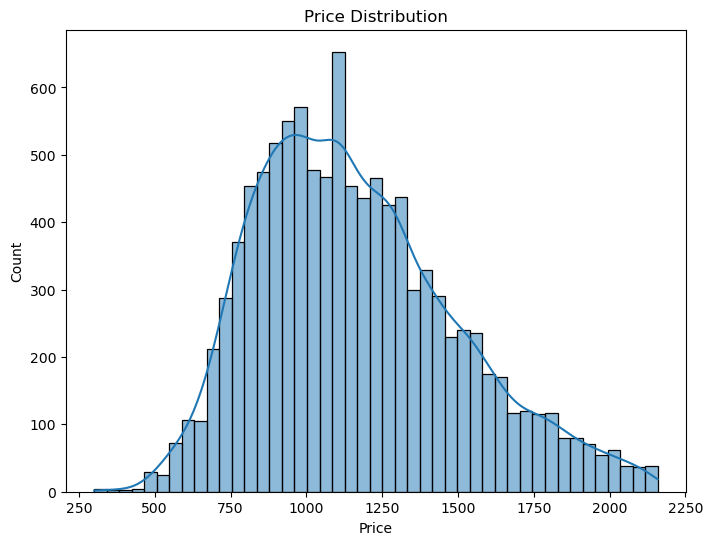

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

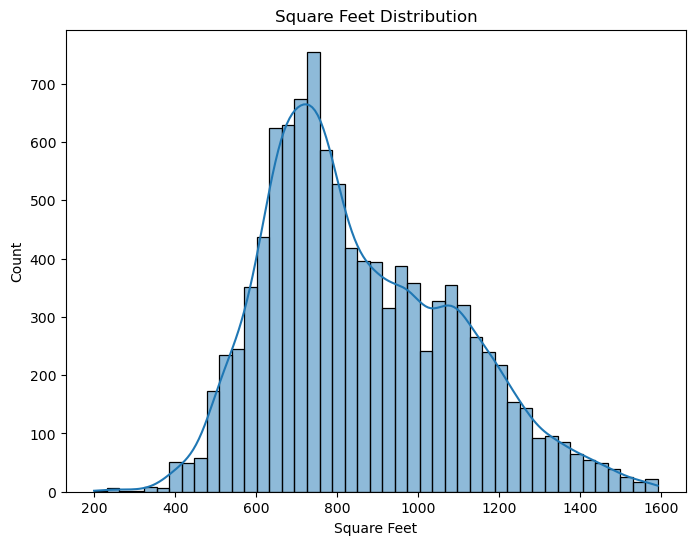

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['square_feet'], kde=True)
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.show()

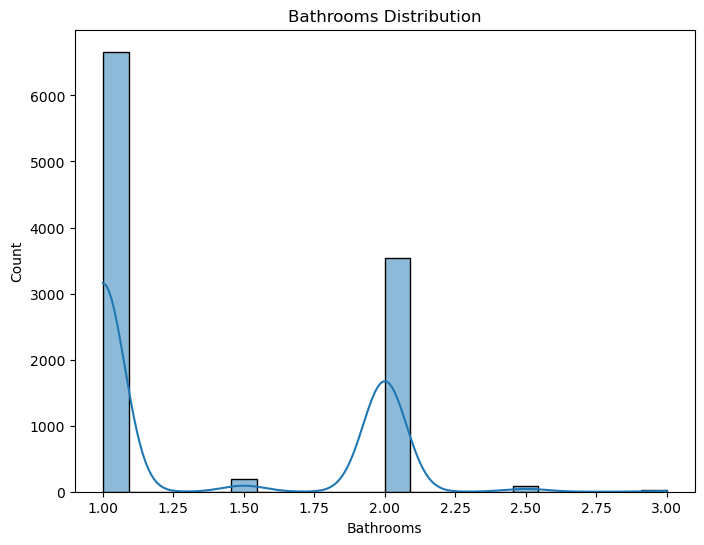

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')
plt.xlabel('Bathrooms')
plt.show()

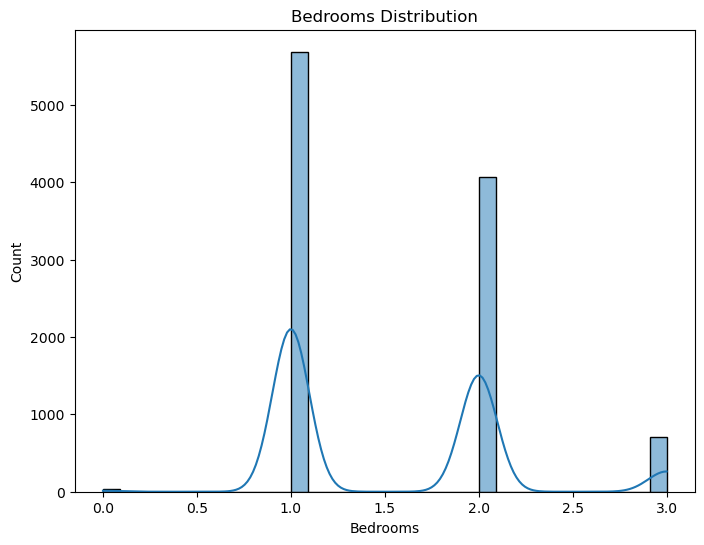

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')
plt.xlabel('Bedrooms')
plt.show()

### Checando se há valores nulos

In [35]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

square_feet        0
price              0
bathrooms          0
bedrooms           0
longitude          0
latitude           0
amenities_count    0
dtype: int64


### Informações sobre o subconjunto do dataset escolhido

In [36]:
df_filtered.head()

,square_feet,price,bathrooms,bedrooms,longitude,latitude,amenities_count
16,800,729.0,1.0,1.0,-98.5253,29.4624,0
21,650,1060.0,1.0,1.0,-97.7497,30.3054,6
22,797,1003.0,1.0,1.0,-97.6873,30.5118,2
23,444,837.0,1.0,1.0,-97.7497,30.3054,3
24,692,1020.0,1.0,1.0,-97.7497,30.3054,3


In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10501 entries, 16 to 99487
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   square_feet      10501 non-null  int64  
 1   price            10501 non-null  float64
 2   bathrooms        10501 non-null  float64
 3   bedrooms         10501 non-null  float64
 4   longitude        10501 non-null  float64
 5   latitude         10501 non-null  float64
 6   amenities_count  10501 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 656.3 KB


In [38]:
df_filtered.describe()

,square_feet,price,bathrooms,bedrooms,longitude,latitude,amenities_count
count,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000,10501.000000
mean,858.398819,1165.249976,1.362965,1.519760,-96.830664,31.879432,3.826302
std,235.257820,332.418207,0.487492,0.625273,0.967558,1.537271,3.168523
min,200.000000,300.000000,1.000000,0.000000,-106.445000,26.159600,0.000000
25%,681.000000,915.000000,1.000000,1.000000,-97.103900,30.305400,1.000000
50%,806.000000,1118.000000,1.000000,1.000000,-96.829200,32.783500,3.000000
75%,1024.000000,1370.000000,2.000000,2.000000,-96.661500,32.918600,6.000000
max,1591.000000,2159.000000,3.000000,3.000000,-93.758100,36.065600,13.000000


Foram selecionadas as colunas que foram julgadas utéis para a clusterização e retirou-se os valores nulos que indicavam de fato valores faltantes. Nesse contexto, assumiu-se que os valores nulos nas colunas pets_allowed e amenities se referem a valores 'Falsos' e não nulos.

## **4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

### Funções auxiliares

In [39]:
#INICIO CODIGO MANUAL
def find_num_cluster(X,ini=2,fim=20,cluster_alg=1, score_type=0, scale_op=0):
    if scale_op==0:
        scaler=StandardScaler()
        X_scaled = scaler.fit_transform(X)
    elif scale_op==1:
        scaler=MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
    elif scale_op==2:
        scaler=RobustScaler()
        X_scaled = scaler.fit_transform(X)


    if score_type==0:
        silhouettes_arr={}
    elif score_type==1:
        davies_bouldin_arr={}
    elif score_type==2:
        chs_arr={}
    elif score_type==3:
        chs_arr={}
        silhouettes_arr={}
        davies_bouldin_arr={}

    for i in range(ini,fim):
        if cluster_alg==0:
            algorithm = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        elif cluster_alg==1:
            algorithm = AgglomerativeClustering(n_clusters=i)
        elif cluster_alg==2:
            algorithm = GaussianMixture(n_components=i, random_state=42)
        elif cluster_alg==3:
            algorithm = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=42)
        labels=algorithm.fit_predict(X_scaled)

        if score_type==0:
            silhouette_avg = round(silhouette_score(X, labels),3)
            silhouettes_arr[i]=silhouette_avg
        elif score_type==1:
            davies_bouldin = round(davies_bouldin_score(X, labels),3)
            davies_bouldin_arr[i]=davies_bouldin
        elif score_type==2:
            chs=round(calinski_harabasz_score(X, labels),3)
            chs_arr[i]=chs
        elif score_type==3:
            chs=round(calinski_harabasz_score(X, labels),3)
            chs_arr[i]=chs
            davies_bouldin = round(davies_bouldin_score(X, labels),3)
            davies_bouldin_arr[i]=davies_bouldin
            silhouette_avg = round(silhouette_score(X, labels),3)
            silhouettes_arr[i]=silhouette_avg

    if score_type==0:
        return silhouettes_arr
    elif score_type==1:
        return davies_bouldin_arr
    elif score_type==2:
        return chs_arr
    elif score_type==3:
        return [silhouettes_arr,davies_bouldin_arr,chs_arr]
#FIM CODIGO MANUAL

In [40]:
#INICIO CODIGO MANUAL
def scores_summary(X):
    scalers=[StandardScaler(), MinMaxScaler(), RobustScaler()]
    cluster_algs=["KMEANS","Hierarchical Clustering (Agglomerative Clustering)","Expectation-Maximization (Gausian Mixture)","Spectral Clustering"]
    for i in range(3):
        print("\n"+str(scalers[i])+":\n")
        for j in range(4):
            print("\t"+str(cluster_algs[j])+":\n")
            arr_info=find_num_cluster(X, cluster_alg=j,score_type=3, scale_op=i) 
            print("\t\tSilhouette score: ", arr_info[0], "\n") 
            print("\t\tDavies Bouldin score: ", arr_info[1], "\n") 
            print("\t\tCalinski Harabasz score: ", arr_info[2], "\n") 
#FIM CODIGO MANUAL

### Padronização dos dados

Primeiramente foi realizada a escolha das colunas que seriam utilizadas para a criação do cluster, selecionando atributos numéricos que acreditamos ser os mais relevantes na escolha e descrição de um apartamento

In [41]:
X = df_filtered[['square_feet', 'price', 'bathrooms', 'bedrooms', 'amenities_count']]

Para realizar a padronização dos dados escolhemos 3 diferentes escaladores, para podermos identificar qual traria efeitos melhores para a nossa clusterização:
    
    1. Standard Scaler: No qual todos os atributos tenham uma distribuição normal com média 0 e desvio padrão igual a 1
    2. Min-Max Scaler: No qual todos os atributos são distribuídos no intervalo entre 0 e 1, sendo consequentemente sensível a outliers
    3. Robust Scaler: O qual utiliza o primeiro e terceiro quartis dos atributos para gerar uma nova escala de dados' menos sensível a outliers

In [43]:
# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler=RobustScaler()
X_scaled = scaler.fit_transform(X)

### Análise do número de cluster ótimo

Utilizamos o método do cotovelo para gerar uma estimativa inicial do número de clusters ideal para o nosso processo, testando o seu desempenho com o kmeans

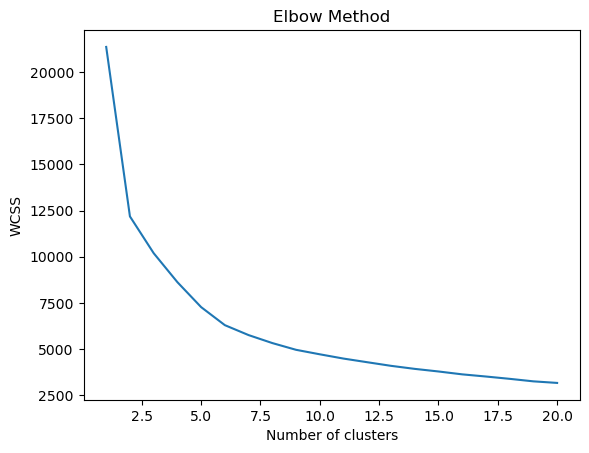

In [44]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


Optamos, também, por gerar os indices de silhueta, de Davies Bouldin e de Calinski Harabsz para clusterizações com o número de clusters(k) entre 2 e 20, permitindo realizar uma análise numérica desses indíces e assim escolher qual k irá proporcionar melhores clusters.
É importante ressaltar, que o resultado dessa análise numérica coincidiu com o observado no gráfico gerado pelo método do cotovelo, demonstrando a eficácia de ambos os métodos.

In [45]:
scores_summary(X)


StandardScaler():

	KMEANS:



		Silhouette score:  {2: 0.331, 3: 0.062, 4: 0.072, 5: 0.138, 6: 0.08, 7: 0.063, 8: 0.032, 9: 0.052, 10: 0.004, 11: -0.032, 12: -0.021, 13: -0.025, 14: -0.038, 15: -0.027, 16: -0.04, 17: -0.043, 18: -0.059, 19: -0.045} 

		Davies Bouldin score:  {2: 1.143, 3: 2.277, 4: 2.019, 5: 3.573, 6: 4.031, 7: 4.853, 8: 4.656, 9: 2.677, 10: 3.251, 11: 4.916, 12: 6.855, 13: 5.362, 14: 6.04, 15: 3.896, 16: 5.748, 17: 6.072, 18: 5.058, 19: 4.565} 

		Calinski Harabasz score:  {2: 5592.065, 3: 3071.489, 4: 3791.158, 5: 5404.763, 6: 4232.982, 7: 3445.891, 8: 3046.737, 9: 3286.143, 10: 2816.721, 11: 2707.282, 12: 2803.616, 13: 2535.009, 14: 2508.436, 15: 2573.25, 16: 2294.66, 17: 2194.043, 18: 2140.388, 19: 2204.165} 

	Hierarchical Clustering (Agglomerative Clustering):

		Silhouette score:  {2: 0.315, 3: 0.034, 4: 0.011, 5: -0.038, 6: -0.029, 7: -0.046, 8: -0.014, 9: -0.021, 10: -0.039, 11: -0.068, 12: -0.079, 13: -0.095, 14: -0.092, 15: -0.108, 16: -0.099, 17: -0.101, 18: -0.095, 19: -0.097} 

		Davi

### Escolha de parâmetros para o DBSCAN

A abordagem de escolha de número de clusters foi eficaz para o outros modelos de clusterização escolhidos, mas para o modelo DBSCAN os parâmetros a serem variados são o episilon e o número mínimo de amostras. Para isso variamos ambos esses valores em um intervalo recomendado pela ferramenta do ChatGPT, e identificando qual combinação deles gerou um indice de silhueta melhor.

In [46]:
scalers=[StandardScaler(),MinMaxScaler(), RobustScaler()]
for scaler in scalers:
    print(str(scaler))
    DB_scaled=scaler.fit_transform(X)
    best_eps, best_min_samples, best_silhouette_score = None, None, -1

    for eps in np.arange(0.1, 1.0, 0.1):
        for min_samples in range(5, 21, 5):
            try:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(DB_scaled)
                silhouette_avg = silhouette_score(DB_scaled, labels)
                if silhouette_avg > best_silhouette_score:
                    best_eps, best_min_samples, best_silhouette_score = eps, min_samples, silhouette_avg
            except Exception as e:
                print(f"Error occurred for eps={eps}, min_samples={min_samples}: {e}")
                break  # Exit the inner loop when an exception occurs
        else:
            continue  # Continue to the next iteration of the outer loop if no exception occurred
        break  # Exit the outer loop when an exception occurs in the inner loop
    print("Best eps:", round(best_eps,1))
    print("Best min_samples:", best_min_samples)
    print("Best Silhouette Score:", best_silhouette_score)


StandardScaler()
Best eps: 0.6
Best min_samples: 20
Best Silhouette Score: 0.17077739486771434
MinMaxScaler()
Error occurred for eps=0.5, min_samples=5: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Best eps: 0.4
Best min_samples: 5
Best Silhouette Score: 0.4172490050070788
RobustScaler()
Best eps: 0.8
Best min_samples: 5
Best Silhouette Score: 0.22207060442582938


Após realizarmos as escolhas dos hiperparâmetros para cada um de nossos modelos de clusterização, precisamos aplicá-los e identificar o desempenho de cada um deldes

### KMEANS

O algoritmo K-means é um algoritmo de clusterização que agrupa os dados em k grupos distintos. Cada um desses clusters é representado por um centróide, que é a média dos pontos do cluster. E o objetivo desse algoritmo é minimizar a variância intra-cluster

In [74]:
k = 4 # Your chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels=kmeans.fit_predict(X_scaled)


### Hierarchical Clustering (Agglomerative Clustering):

O Hierarchical CLustering é um algoritmo de clusterização que constrói uma hierarquia de clusters. A versão aglomerativa começa com pontos individuais e realiza uniões com clusters próximos até gerar o número de clusters desejado

In [48]:
num_clusters = 4

# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg_clustering.fit_predict(X_scaled)

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

O DBSCAN é um algoritmo de clusterização que agrupa os pontos com base na densidade local. As vantagens desse método são a capacidade de identificar clusters de forma flexível, podendo encontrar clusters de tamanhos e formas diferentes, sem a necessidade da definição de um número inicial de clusters, e identificando outliers

In [49]:
eps_value = 0.8  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The minimum number of samples in a neighborhood for a point to be a core point
db_clustering = DBSCAN(eps=eps_value, min_samples=min_samples)
db_labels = db_clustering.fit_predict(X_scaled)

In [50]:
# Check the cluster sizes, consider -1 as noise points in DBSCAN
cluster_sizes=np.bincount(db_labels+1)
print("Cluster Sizes (Including Noise Points):")
print(cluster_sizes)

Cluster Sizes (Including Noise Points):
[ 119 5670 4048   24   34  598    8]


###  Expectation-Maximization (Gausian Mixture):

In [51]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

### Spectral Clustering:

In [52]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels=spectral.fit_predict(X_scaled)

# **Resultados Experimentais e Análise**

## **5. Evaluation (Validação)**


### Funções auxiliares

In [53]:
def clustering_info(X, labels):
        silhouette_avg = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        chs = calinski_harabasz_score(X, labels)
        print(f"Silhouette Score: {silhouette_avg}")
        print(f"Davies-Bouldin Index: {davies_bouldin}")
        print(f"Calinski and Harabasz Score: {chs}")

In [54]:
def plot_PCA(df_filtered, labels):

    # Assuming 'data' is your dataset and 'labels' contains cluster assignments
    # Reduce the dimensionality using PCA to 2 components
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(df_filtered)

    # Get the explained variance ratio for the first 2 components
    explained_var_ratio = pca.explained_variance_ratio_

    # Create a scatter plot for each cluster
    for cluster_label in set(labels):
        # Select data points belonging to the current cluster
        cluster_data = data_pca[labels == cluster_label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.5, s = 10)

    # Add labels and a legend
    plt.xlabel(f'Principal Component 1 ({explained_var_ratio[0]*100:.2f}%)')
    plt.ylabel(f'Principal Component 2 ({explained_var_ratio[1]*100:.2f}%)')
    plt.legend()
    plt.title('Cluster Visualization using PCA')
    plt.show()

In [55]:
def plot_attributes(df_filtered, labels, att1='price', att2='square_feet'):
    # Select the features for x and y axes
    x = df_filtered[att1]
    y = df_filtered[att2]

    # Create a scatter plot for each cluster
    for cluster_label in set(labels):
        cluster_x = x[labels == cluster_label]
        cluster_y = y[labels == cluster_label]
        plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster_label}')

    # Add labels and a legend
    plt.xlabel(att1)
    plt.ylabel(att2)
    plt.legend()
    plt.title('Cluster Visualization based on '+ att1 +' and '+att2)
    plt.show()


In [56]:
def plot_boxplots_by_cluster(dataframe, cluster_labels, value_column):
    # Create a new DataFrame by combining the cluster labels and the value column
    data = pd.DataFrame({value_column: dataframe[value_column].values, 'Cluster': cluster_labels})
    
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    sns.boxplot(x='Cluster', y=value_column, data=data)
    plt.title(f'Boxplots for {value_column} by cluster')
    plt.xlabel('Cluster')
    plt.ylabel(value_column)
    plt.show()

In [57]:
def generate_cluster_summary(dataframe, cluster_labels):
    """
    Generate summary statistics (mean and median) for every column within each cluster.

    Args:
    dataframe (pd.DataFrame): Input DataFrame containing attributes.
    cluster_labels (array-like): Array containing cluster labels for each row in the DataFrame.

    Returns:
    pd.DataFrame: Summary statistics DataFrame containing mean and median values for every column within each cluster.
    """
    # Add cluster labels to the original DataFrame
    dataframe['Cluster'] = cluster_labels
    
    # Group by 'Cluster' and calculate mean and median for each column
    summary_stats = dataframe.groupby('Cluster').agg(['mean', 'median', 'min', 'max'])
    
    return summary_stats


### Clusters Info

In [58]:
print("KMEANS:\n")
clustering_info(X, kmeans_labels)
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
clustering_info(X, agg_labels)
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
clustering_info(X, db_labels)
print("\nExpectation-Maximization (Gausian Mixture):\n")
clustering_info(X, gmm_labels)
print("\nSpectral Clustering:\n")
clustering_info(X, spectral_labels)

KMEANS:



Silhouette Score: 0.2969710981353535
Davies-Bouldin Index: 1.0848503010277049
Calinski and Harabasz Score: 7674.782045922731

Hierarchical Clustering (Agglomerative Clustering):

Silhouette Score: 0.2294303969575473
Davies-Bouldin Index: 1.4036416572461616
Calinski and Harabasz Score: 5436.711919226775

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Silhouette Score: -0.19342200605604504
Davies-Bouldin Index: 6.3366587174897555
Calinski and Harabasz Score: 696.4536357402084

Expectation-Maximization (Gausian Mixture):

Silhouette Score: 0.15096817427339732
Davies-Bouldin Index: 2.6298364513550925
Calinski and Harabasz Score: 1808.396475139408

Spectral Clustering:

Silhouette Score: 0.14859583917747085
Davies-Bouldin Index: 2.032571162312186
Calinski and Harabasz Score: 1937.8797376468237


### Médias e Medianas dos clusters

In [59]:
print("KMEANS:\n")
generate_cluster_summary(X, kmeans_labels)

KMEANS:



/tmp/ipykernel_11988/761070392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Cluster'] = cluster_labels


square_feet                           price                         \
                mean  median  min   max         mean  median    min     max   
Cluster                                                                       
0         765.996375   764.0  334  1197  1327.776480  1285.0  877.0  2152.0   
1         661.256838   667.0  200  1127   876.063731   880.0  300.0  1355.0   
2        1205.858228  1185.0  644  1591  1601.466835  1565.0  975.0  2159.0   
3         968.978634   968.0  400  1445  1078.188102  1097.0  370.0  1668.0   

        bathrooms                   bedrooms                  amenities_count  \
             mean median  min  max      mean median  min  max            mean   
Cluster                                                                         
0        1.010874    1.0  1.0  2.0  1.089811    1.0  0.0  3.0        2.356424   
1        1.007112    1.0  1.0  2.0  1.053884    1.0  0.0  3.0        4.583425   
2        2.004304    2.0  1.0  3.0  2.268354    2.0  1.0  3.0        3.265823   
3        1.743611    2.0  1.0  3.0  2.061165    2.0  1.0  3.0        4.659405   

                        
        median min max  
Cluster                 
0          2.0   0  13  
1          4.0   0  13  
2          3.0   0  13  
3          4.0   0  13

In [60]:
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
generate_cluster_summary(X, agg_labels)


Hierarchical Clustering (Agglomerative Clustering):



/tmp/ipykernel_11988/761070392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Cluster'] = cluster_labels


square_feet                           price                         \
                mean  median  min   max         mean  median    min     max   
Cluster                                                                       
0         652.095014   660.0  200  1262   867.364378   872.0  309.0  1355.0   
1         897.773779   920.0  324  1418  1054.115681  1066.5  300.0  2097.0   
2        1172.601649  1157.0  540  1591  1521.008660  1499.0  390.0  2159.0   
3         781.649824   775.0  425  1472  1301.023502  1260.0  425.0  2152.0   

        bathrooms                   bedrooms                  amenities_count  \
             mean median  min  max      mean median  min  max            mean   
Cluster                                                                         
0        1.002979    1.0  1.0  2.0  0.997805    1.0  0.0  2.0        4.251803   
1        1.556555    2.0  1.0  2.5  2.026135    2.0  1.0  3.0        4.024850   
2        2.017320    2.0  1.0  3.0  2.265979    2.0  1.0  3.0        3.727010   
3        1.014101    1.0  1.0  2.0  1.000000    1.0  0.0  2.0        3.207599   

                        
        median min max  
Cluster                 
0          3.0   0  13  
1          3.0   0  13  
2          3.0   0  13  
3          3.0   0  13

In [61]:
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
generate_cluster_summary(X, db_labels)


DBSCAN (Density-Based Spatial Clustering of Applications with Noise):



/tmp/ipykernel_11988/761070392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Cluster'] = cluster_labels


square_feet                           price                         \
                mean  median  min   max         mean  median    min     max   
Cluster                                                                       
-1       1007.588235  1100.0  275  1588  1326.252101  1375.0  337.0  2155.0   
 0        710.395591   708.0  200  1354  1060.391358  1009.0  309.0  2152.0   
 1       1001.591156  1010.5  324  1591  1262.058053  1229.0  300.0  2159.0   
 2        451.583333   412.5  300   692   916.250000   897.5  785.0  1189.0   
 3        620.705882   599.0  400   900  1110.676471  1075.0  775.0  1375.0   
 4       1294.926421  1302.0  790  1586  1484.792642  1495.0  716.0  2145.0   
 5        681.375000   683.0  635   730  1197.125000  1207.5  942.0  1448.0   

        bathrooms                   bedrooms                  amenities_count  \
             mean median  min  max      mean median  min  max            mean   
Cluster                                                                         
-1       1.710084    1.0  1.0  3.0  2.294118    3.0  0.0  3.0        3.857143   
 0       1.006790    1.0  1.0  2.0  1.000000    1.0  1.0  1.0        3.786596   
 1       1.759881    2.0  1.0  3.0  2.000000    2.0  2.0  2.0        3.951334   
 2       1.000000    1.0  1.0  1.0  0.000000    0.0  0.0  0.0        0.458333   
 3       1.000000    1.0  1.0  1.0  3.000000    3.0  3.0  3.0        0.529412   
 4       2.010870    2.0  1.0  3.0  3.000000    3.0  3.0  3.0        3.724080   
 5       2.000000    2.0  2.0  2.0  3.000000    3.0  3.0  3.0        0.000000   

                        
        median min max  
Cluster                 
-1         3.0   0  13  
 0         3.0   0  13  
 1         3.0   0  13  
 2         0.0   0   3  
 3         0.0   0   3  
 4         3.0   0  13  
 5         0.0   0   0

In [62]:
print("\nExpectation-Maximization (Gausian Mixture):\n")
generate_cluster_summary(X, gmm_labels)


Expectation-Maximization (Gausian Mixture):



/tmp/ipykernel_11988/761070392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Cluster'] = cluster_labels


square_feet                           price                         \
                mean  median  min   max         mean  median    min     max   
Cluster                                                                       
0        1002.371716  1011.0  324  1591  1263.313283  1230.0  300.0  2159.0   
1         708.029443   705.0  200  1438  1057.384368  1006.0  309.0  2152.0   
2        1169.404126  1243.0  275  1588  1414.117718  1424.5  390.0  2155.0   

        bathrooms                   bedrooms                  amenities_count  \
             mean median  min  max      mean median  min  max            mean   
Cluster                                                                         
0        1.759759    2.0  1.0  3.0  2.000000    2.0  2.0  2.0        3.962436   
1        1.000000    1.0  1.0  1.0  1.000000    1.0  1.0  1.0        3.793719   
2        1.870146    2.0  1.0  3.0  2.680825    3.0  0.0  3.0        3.375000   

                        
        median min max  
Cluster                 
0          3.0   0  13  
1          3.0   0  13  
2          3.0   0  13

In [63]:
print("\nSpectral Clustering:\n")
generate_cluster_summary(X, spectral_labels)


Spectral Clustering:



/tmp/ipykernel_11988/761070392.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Cluster'] = cluster_labels


square_feet                           price                         \
                mean  median  min   max         mean  median    min     max   
Cluster                                                                       
0         709.748164   706.0  200  1438  1059.958727  1007.5  309.0  2152.0   
1        1002.110130  1011.0  324  1591  1263.499632  1230.0  300.0  2159.0   
2        1232.440510  1275.0  400  1588  1450.648725  1450.0  390.0  2155.0   

        bathrooms                   bedrooms                  amenities_count  \
             mean median  min  max      mean median  min  max            mean   
Cluster                                                                         
0        1.008307    1.0  1.0  2.0  0.994229    1.0  0.0  1.0        3.775971   
1        1.759750    2.0  1.0  3.0  2.000491    2.0  1.0  3.0        3.964925   
2        1.944051    2.0  1.0  3.0  3.000000    3.0  3.0  3.0        3.433428   

                        
        median min max  
Cluster                 
0          3.0   0  13  
1          3.0   0  13  
2          3.0   0  13

### Gráficos PCA

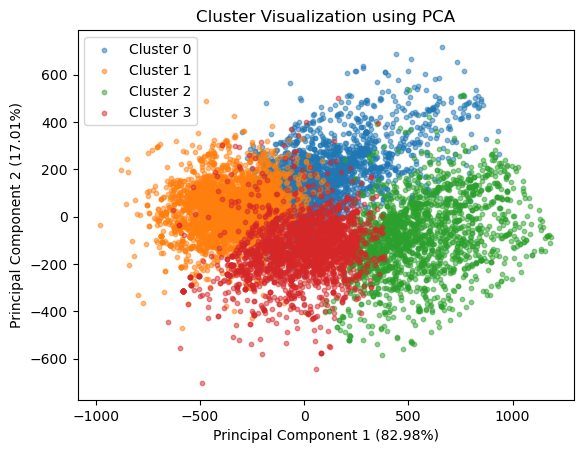

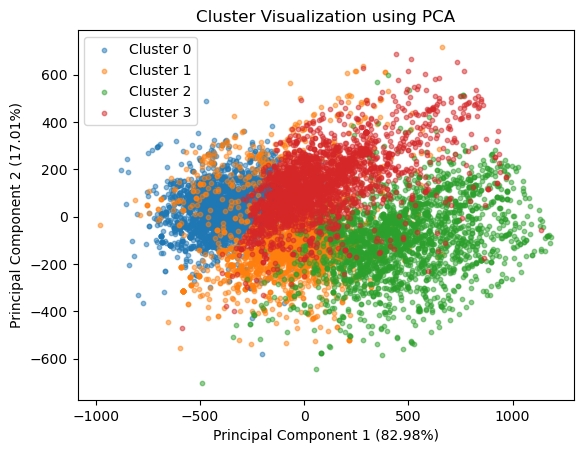

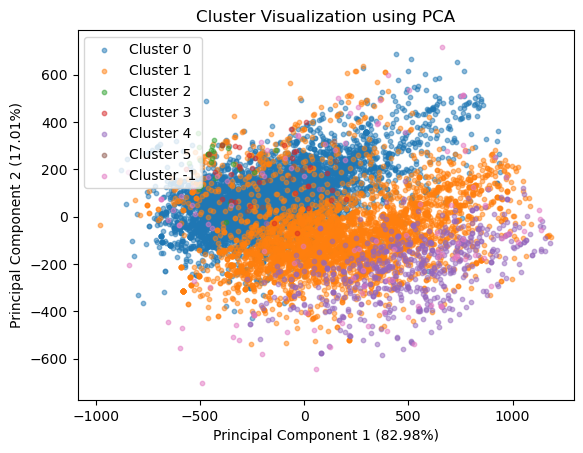

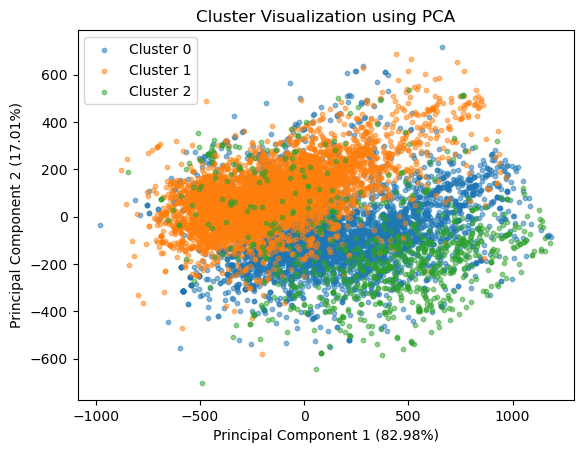

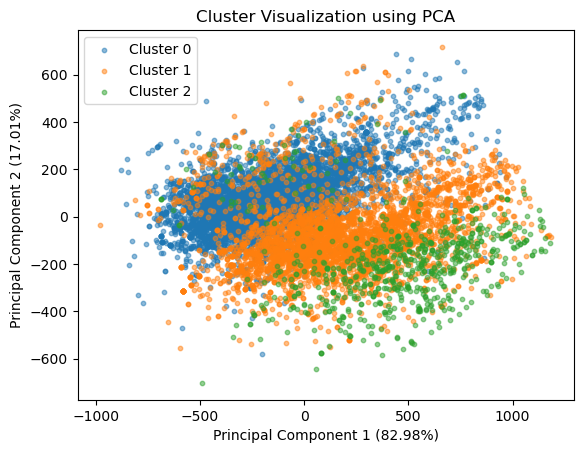

In [64]:
plot_PCA(df_filtered, kmeans_labels)
plot_PCA(df_filtered, agg_labels)
plot_PCA(df_filtered, db_labels)
plot_PCA(df_filtered, gmm_labels)
plot_PCA(df_filtered, spectral_labels)

### Gráficos preço por metro quadrado

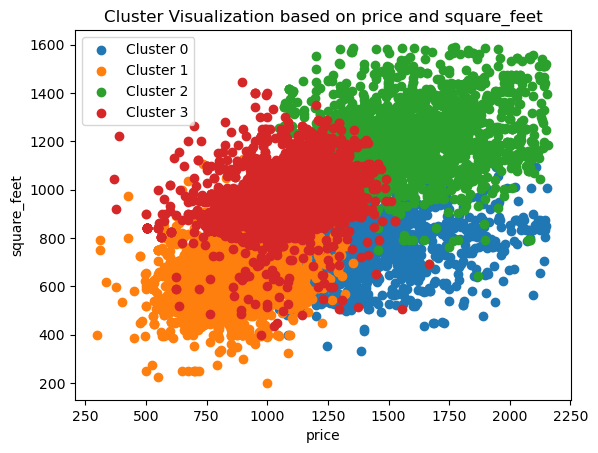

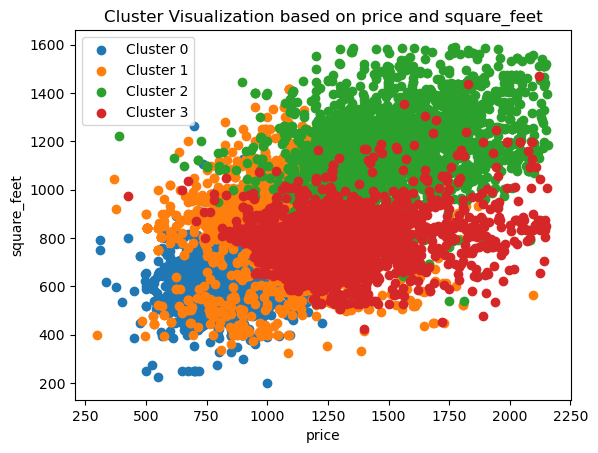

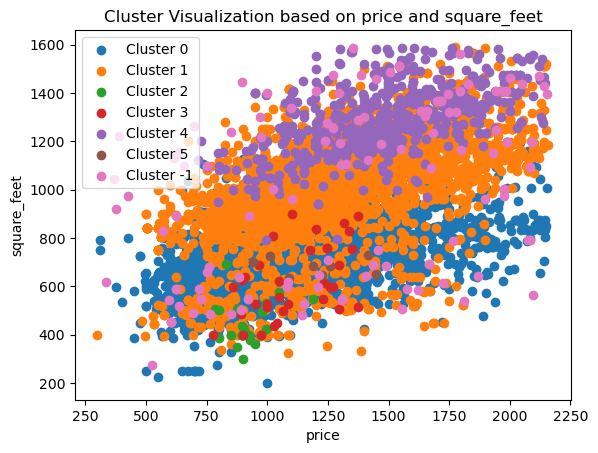

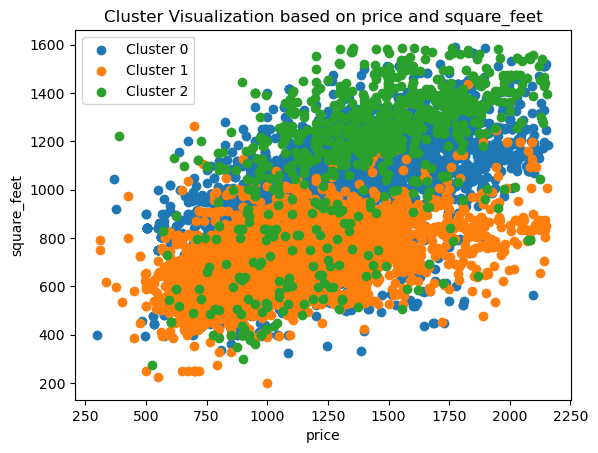

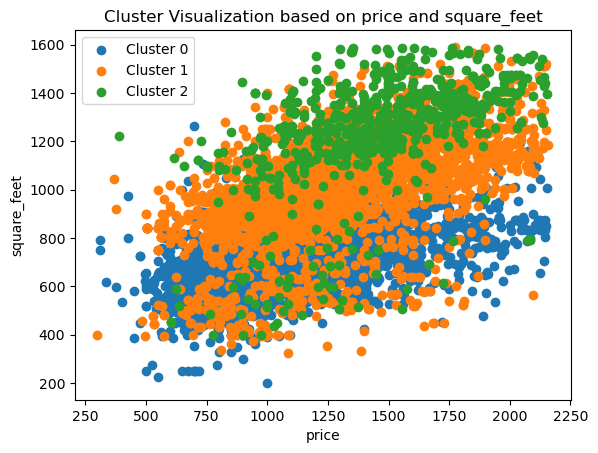

In [65]:
plot_attributes(df_filtered, kmeans_labels, 'price', 'square_feet')
plot_attributes(df_filtered, agg_labels, 'price', 'square_feet')
plot_attributes(df_filtered, db_labels, 'price', 'square_feet')
plot_attributes(df_filtered, gmm_labels, 'price', 'square_feet')
plot_attributes(df_filtered, spectral_labels, 'price', 'square_feet')

### Gráficos preço por número de amenities

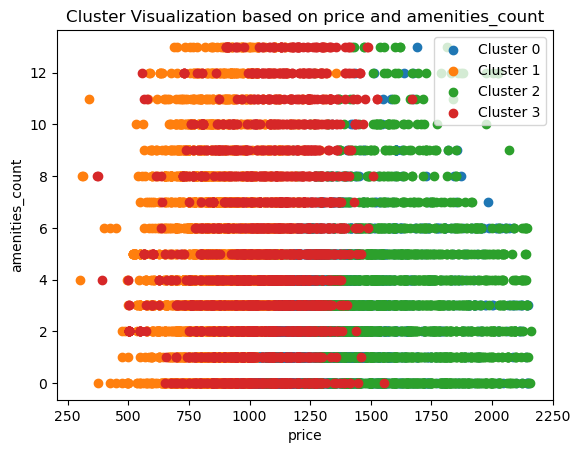

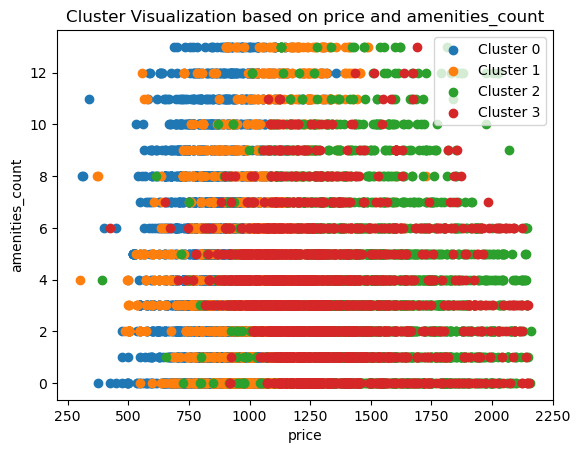

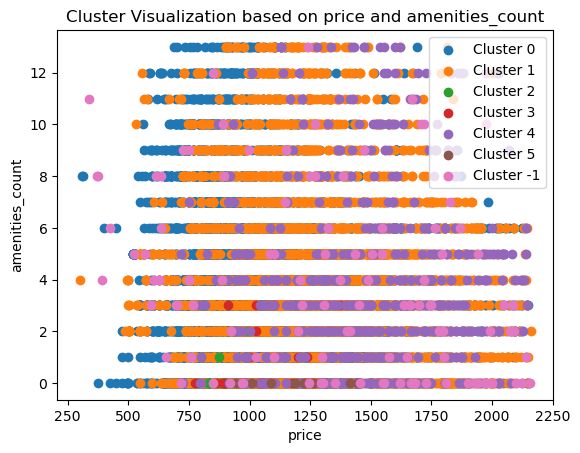

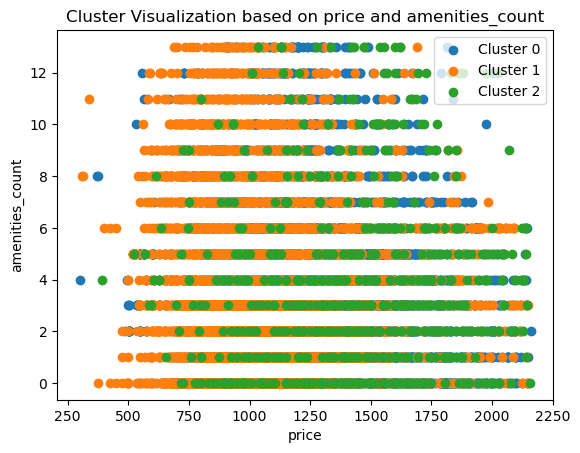

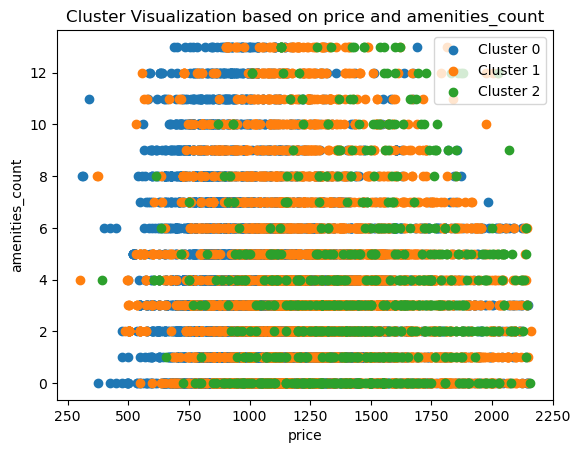

In [66]:
plot_attributes(df_filtered, kmeans_labels, 'price', 'amenities_count')
plot_attributes(df_filtered, agg_labels, 'price', 'amenities_count')
plot_attributes(df_filtered, db_labels, 'price', 'amenities_count')
plot_attributes(df_filtered, gmm_labels, 'price', 'amenities_count')
plot_attributes(df_filtered, spectral_labels, 'price', 'amenities_count')

### Clusters Boxplots

#### Preço

KMEANS:



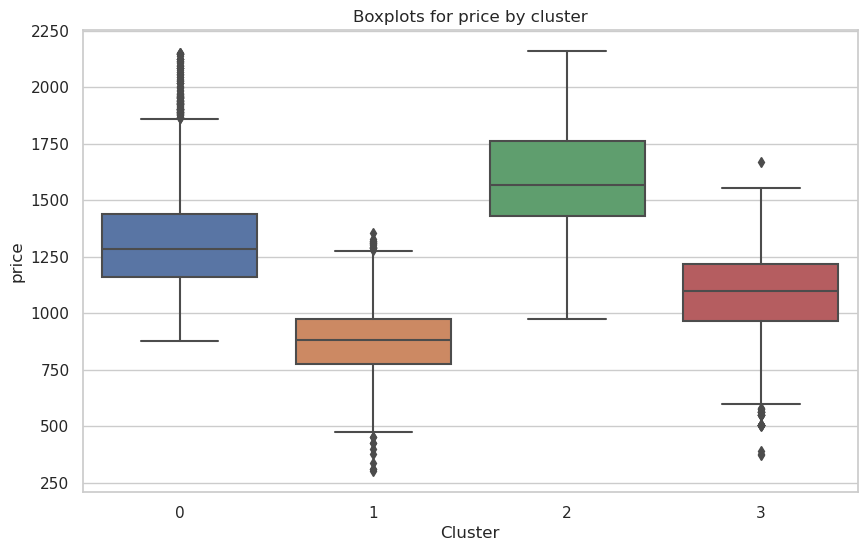


Hierarchical Clustering (Agglomerative Clustering):



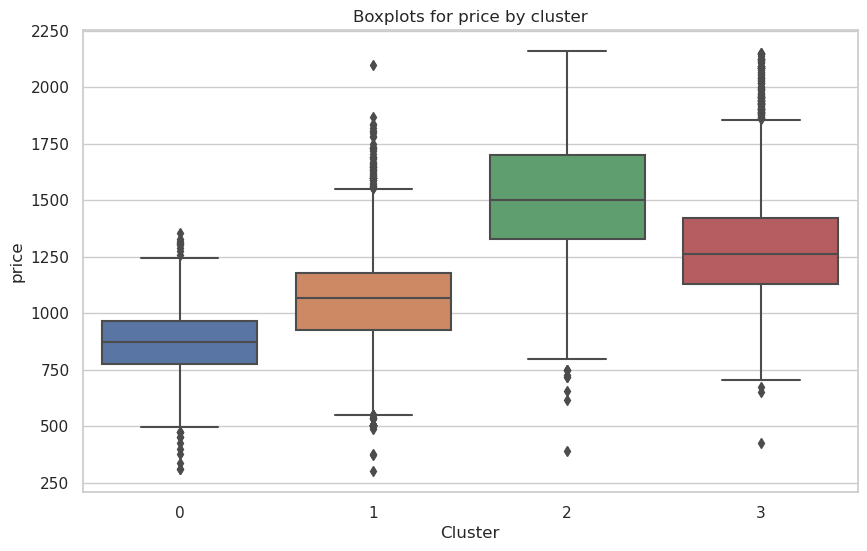


DBSCAN (Density-Based Spatial Clustering of Applications with Noise):



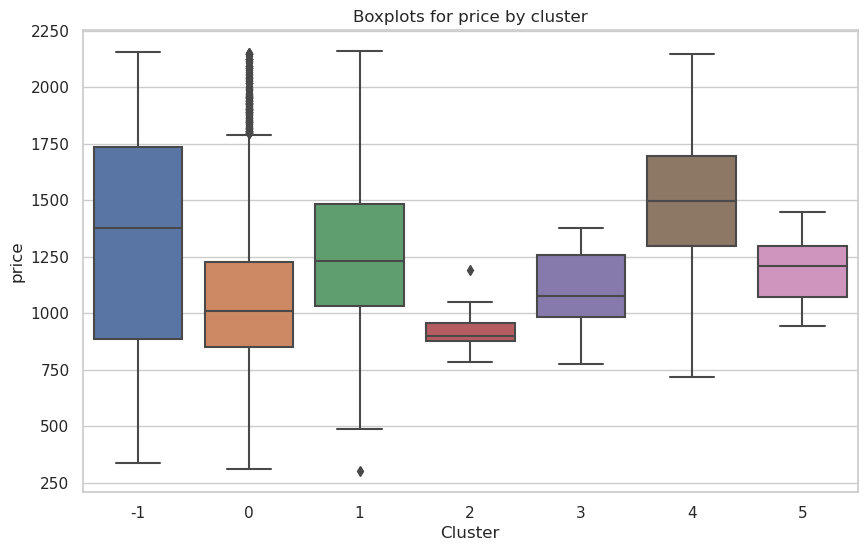


Expectation-Maximization (Gausian Mixture):



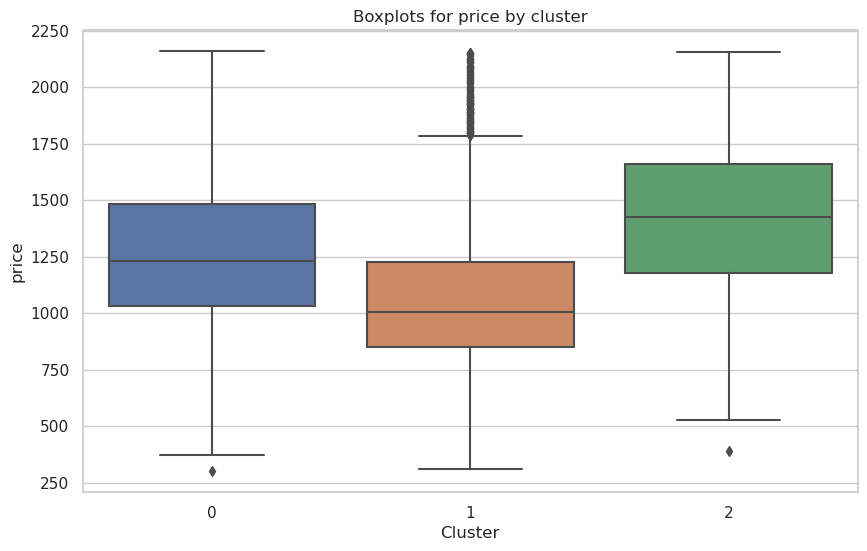


Spectral Clustering:



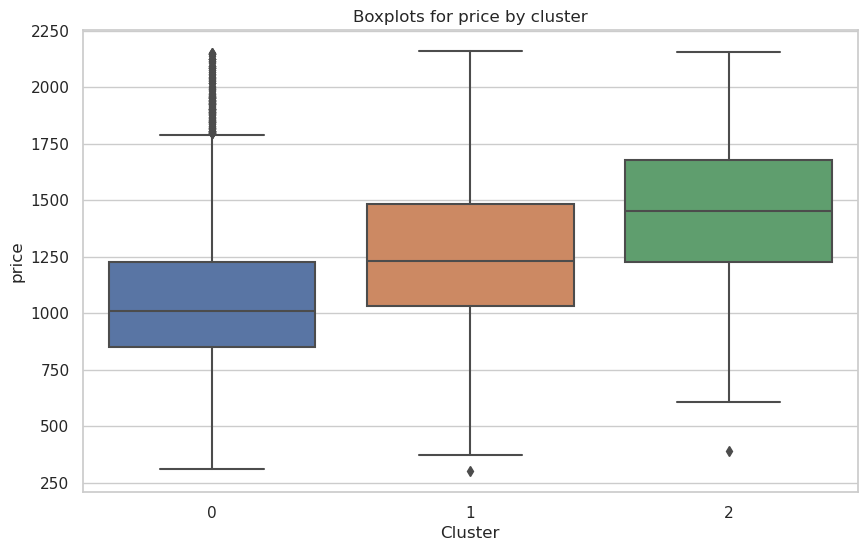

In [67]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'price')
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
plot_boxplots_by_cluster(X, agg_labels, 'price')
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
plot_boxplots_by_cluster(X, db_labels, 'price')
print("\nExpectation-Maximization (Gausian Mixture):\n")
plot_boxplots_by_cluster(X, gmm_labels, 'price')
print("\nSpectral Clustering:\n")
plot_boxplots_by_cluster(X, spectral_labels, 'price')

#### Metros Quadrados

KMEANS:



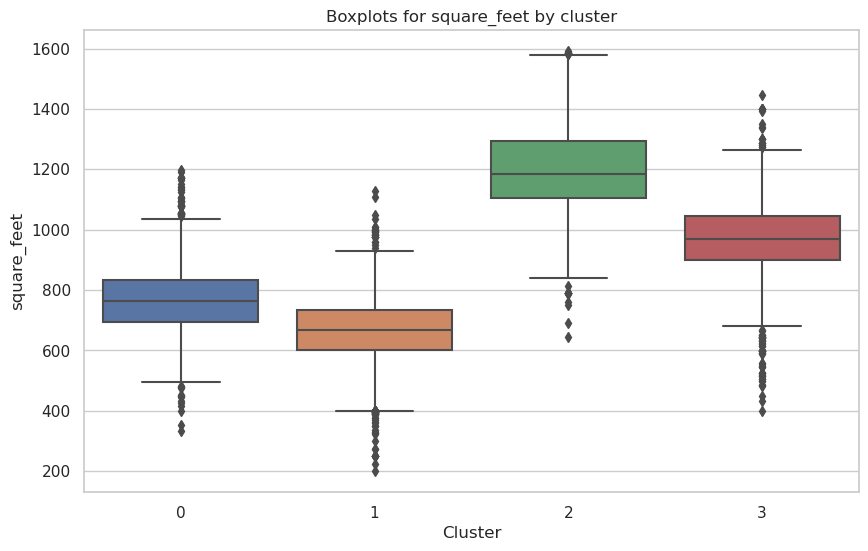


Hierarchical Clustering (Agglomerative Clustering):



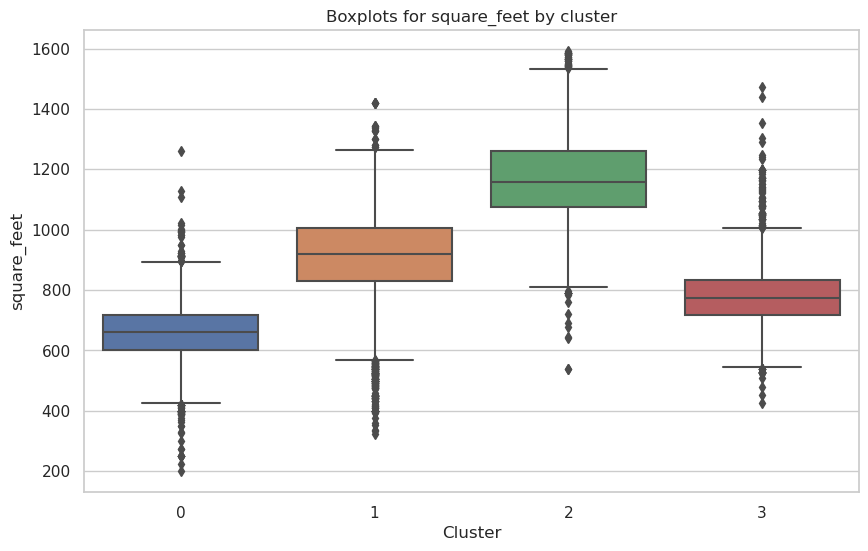


DBSCAN (Density-Based Spatial Clustering of Applications with Noise):



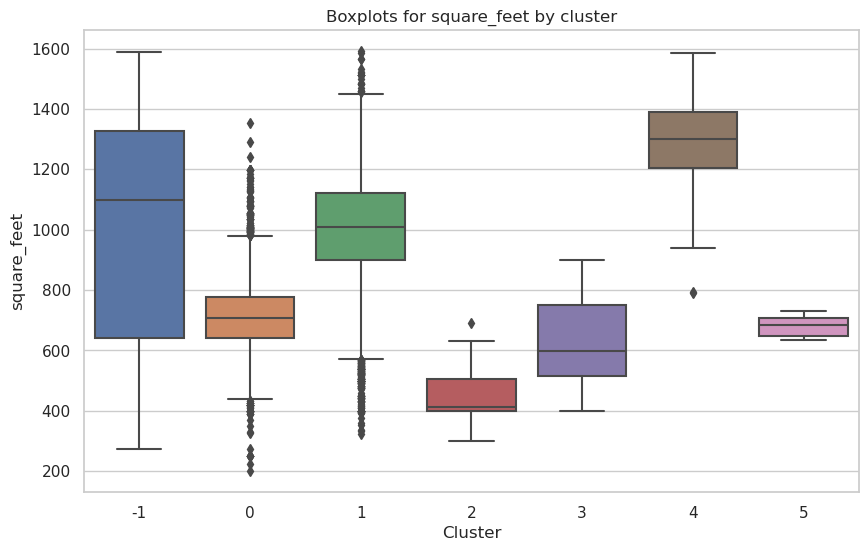


Expectation-Maximization (Gausian Mixture):



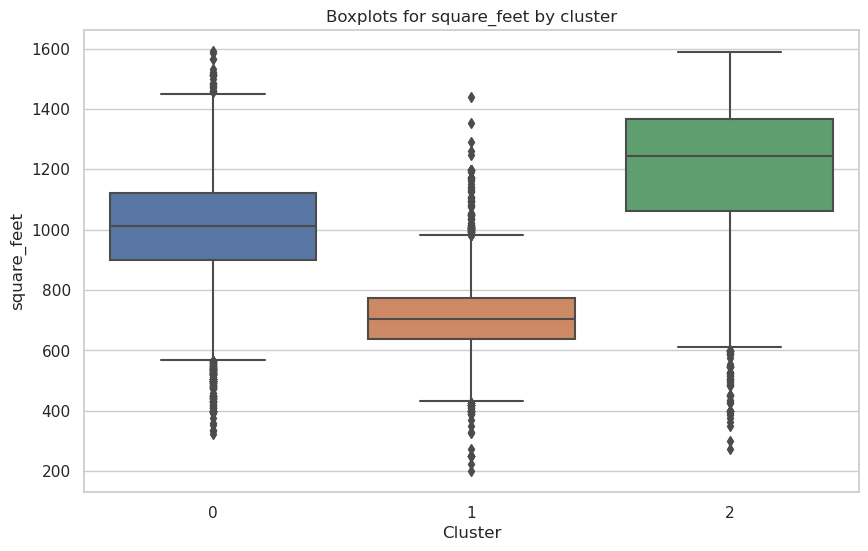


Spectral Clustering:



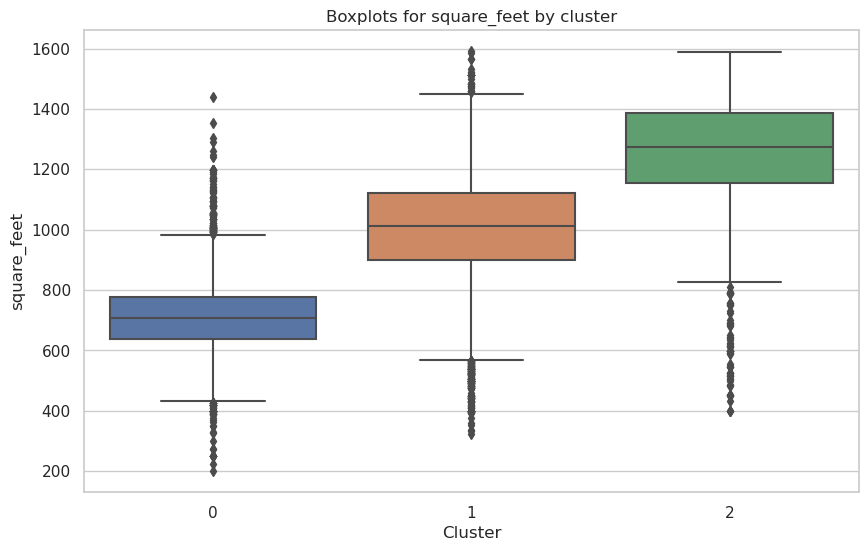

In [68]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'square_feet')
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
plot_boxplots_by_cluster(X, agg_labels, 'square_feet')
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
plot_boxplots_by_cluster(X, db_labels, 'square_feet')
print("\nExpectation-Maximization (Gausian Mixture):\n")
plot_boxplots_by_cluster(X, gmm_labels, 'square_feet')
print("\nSpectral Clustering:\n")
plot_boxplots_by_cluster(X, spectral_labels, 'square_feet')

#### Número de Amenities

KMEANS:



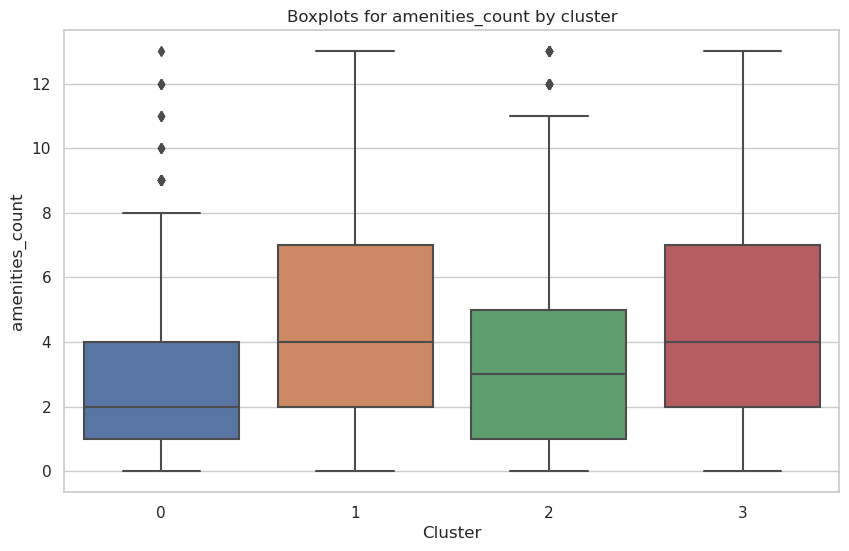


Hierarchical Clustering (Agglomerative Clustering):



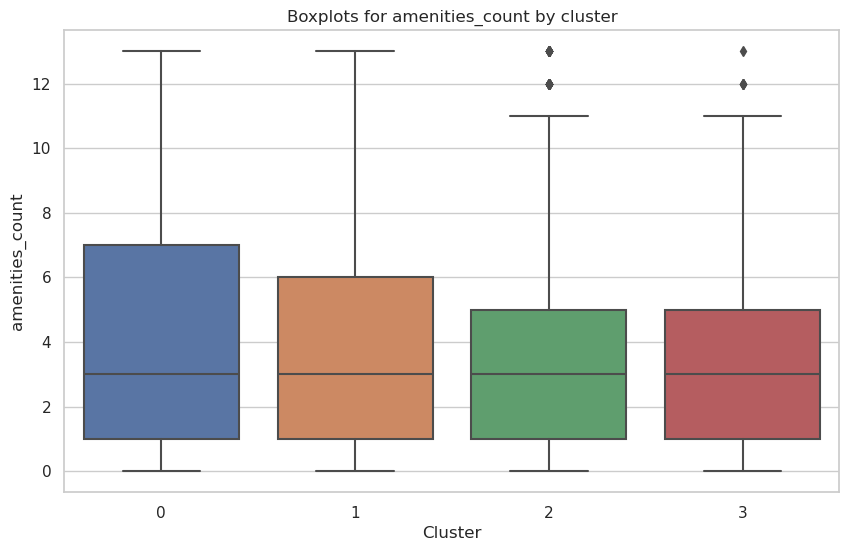


DBSCAN (Density-Based Spatial Clustering of Applications with Noise):



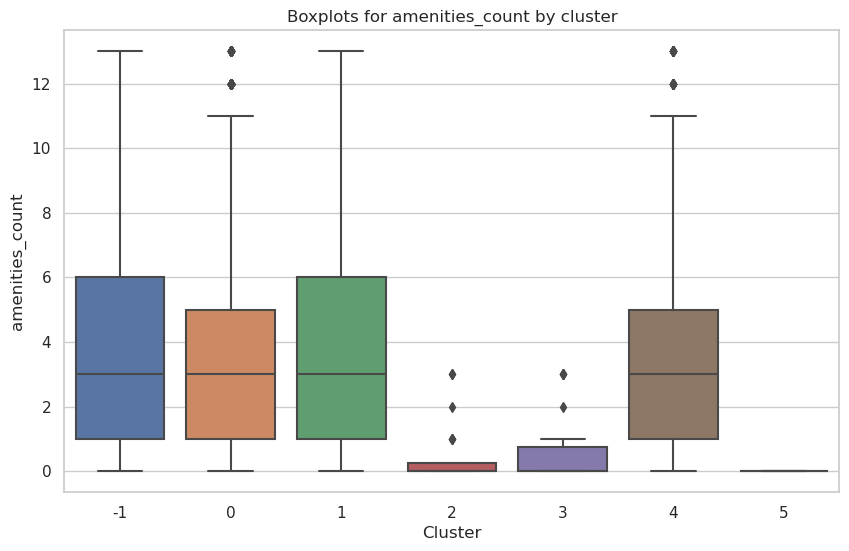


Expectation-Maximization (Gausian Mixture):



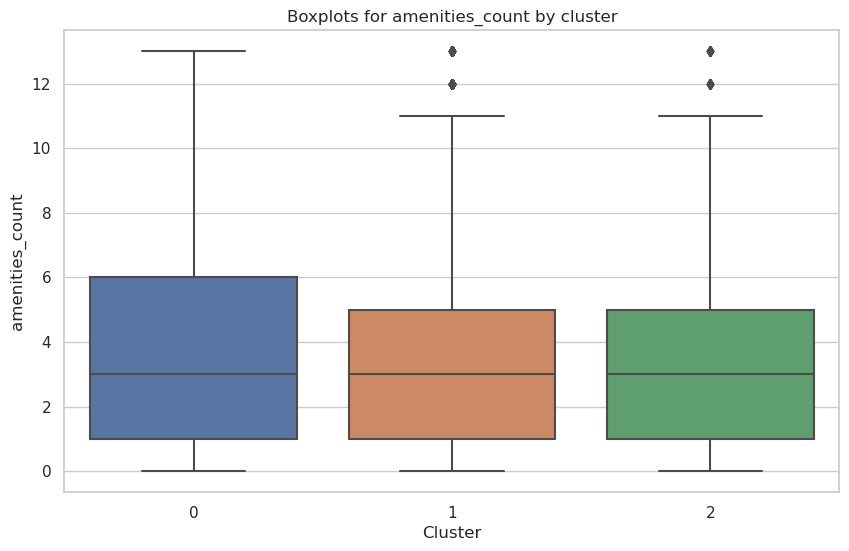


Spectral Clustering:



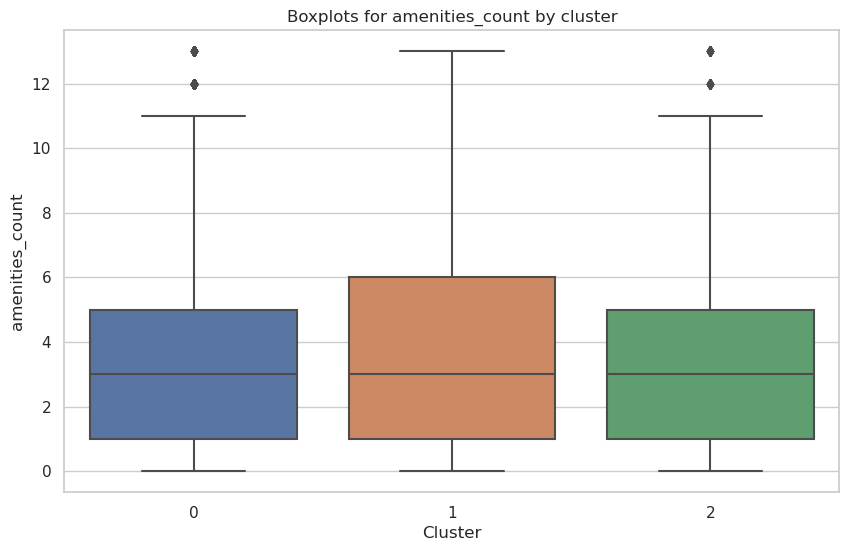

In [69]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'amenities_count')
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
plot_boxplots_by_cluster(X, agg_labels, 'amenities_count')
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
plot_boxplots_by_cluster(X, db_labels, 'amenities_count')
print("\nExpectation-Maximization (Gausian Mixture):\n")
plot_boxplots_by_cluster(X, gmm_labels, 'amenities_count')
print("\nSpectral Clustering:\n")
plot_boxplots_by_cluster(X, spectral_labels, 'amenities_count')

#### Quartos

KMEANS:



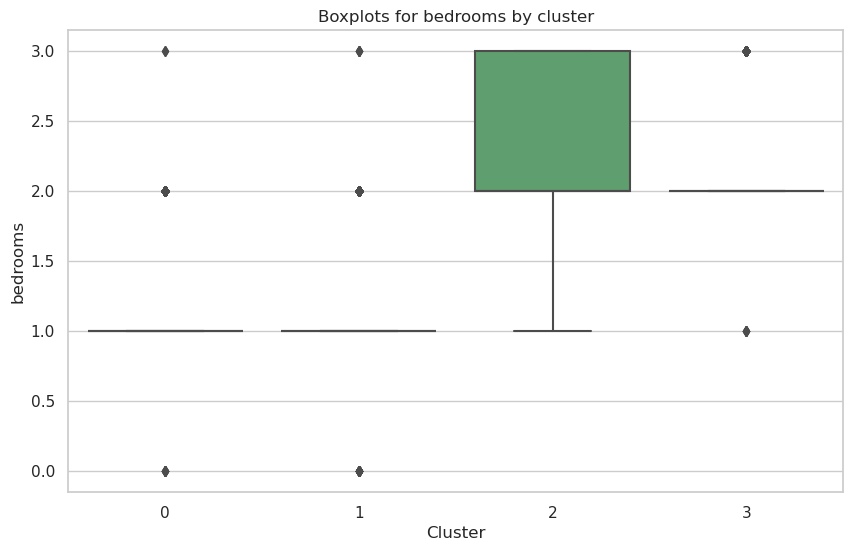


Hierarchical Clustering (Agglomerative Clustering):



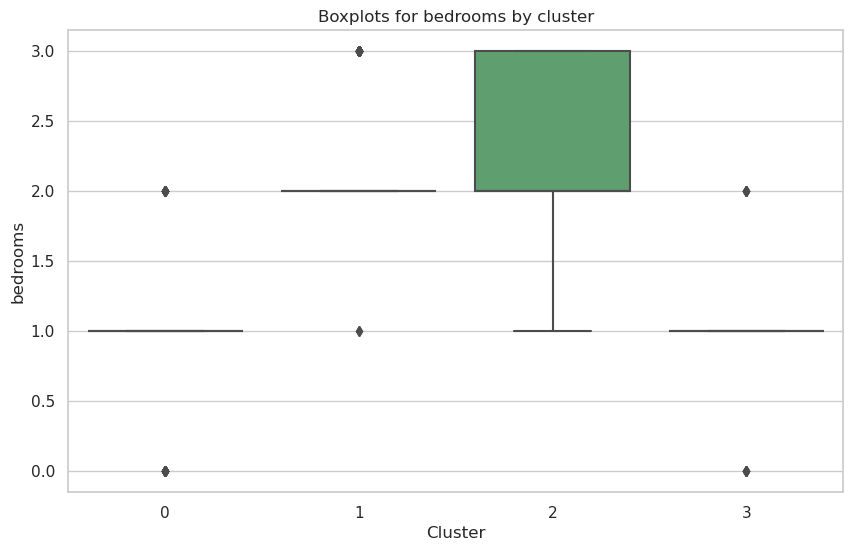


DBSCAN (Density-Based Spatial Clustering of Applications with Noise):



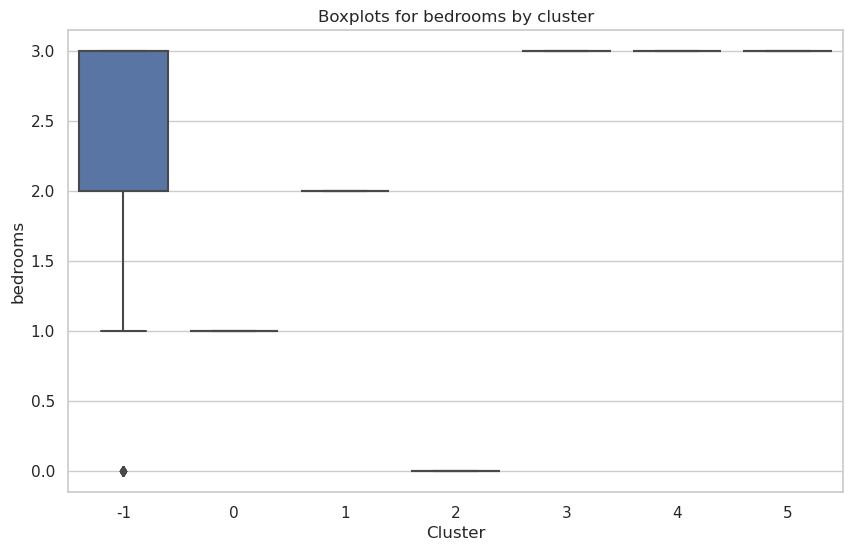


Expectation-Maximization (Gausian Mixture):



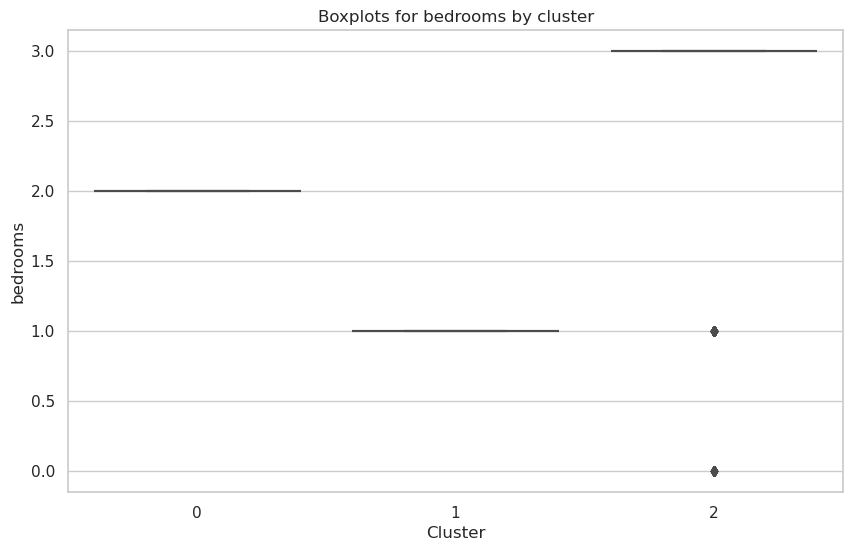


Spectral Clustering:



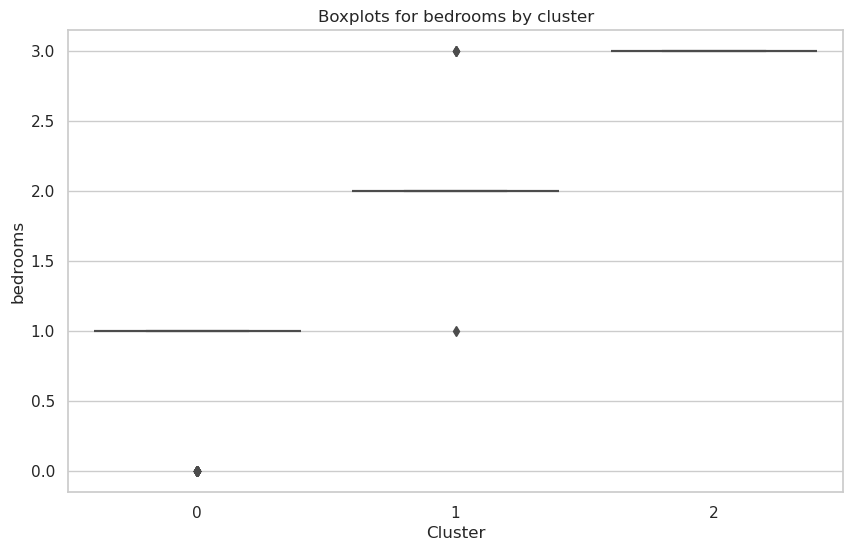

In [70]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'bedrooms')
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
plot_boxplots_by_cluster(X, agg_labels, 'bedrooms')
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
plot_boxplots_by_cluster(X, db_labels, 'bedrooms')
print("\nExpectation-Maximization (Gausian Mixture):\n")
plot_boxplots_by_cluster(X, gmm_labels, 'bedrooms')
print("\nSpectral Clustering:\n")
plot_boxplots_by_cluster(X, spectral_labels, 'bedrooms')

#### Banheiros

KMEANS:



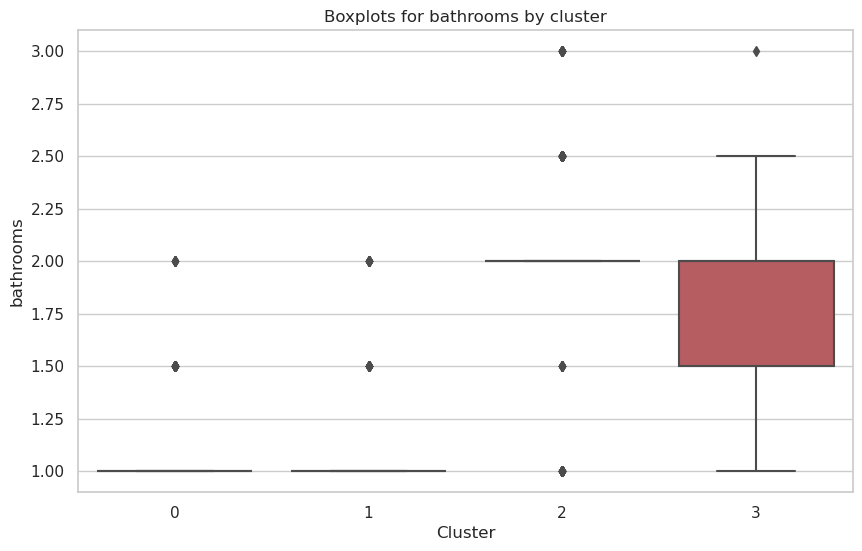


Hierarchical Clustering (Agglomerative Clustering):



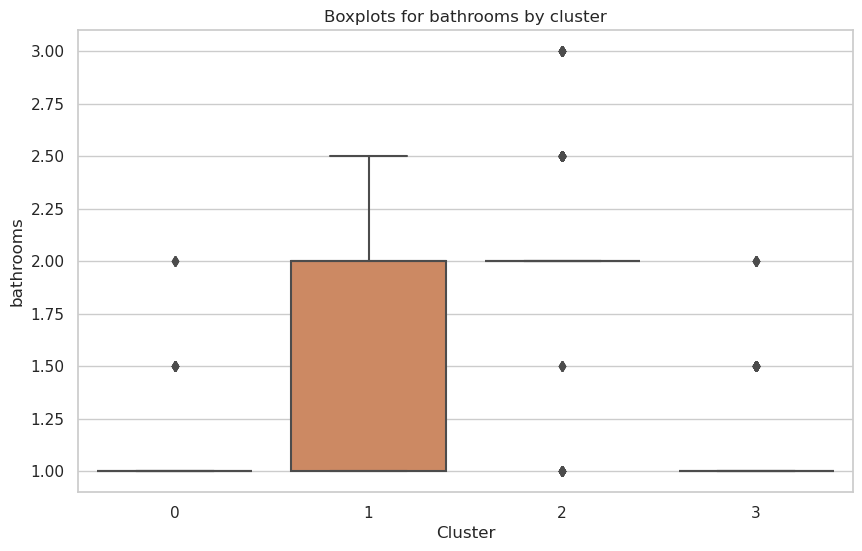


DBSCAN (Density-Based Spatial Clustering of Applications with Noise):



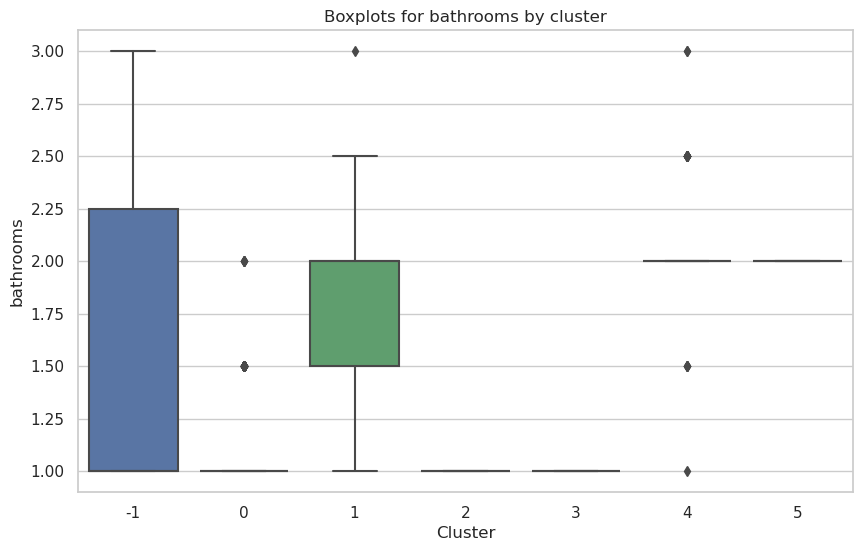


Expectation-Maximization (Gausian Mixture):



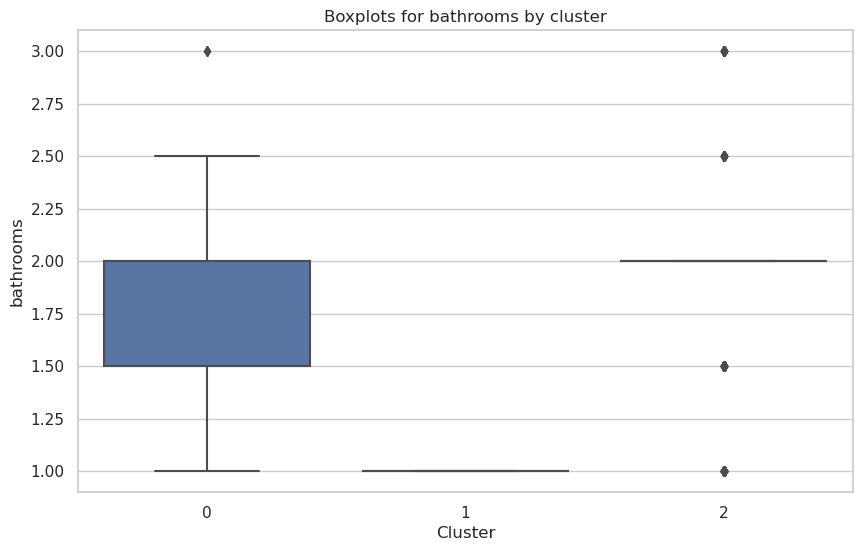


Spectral Clustering:



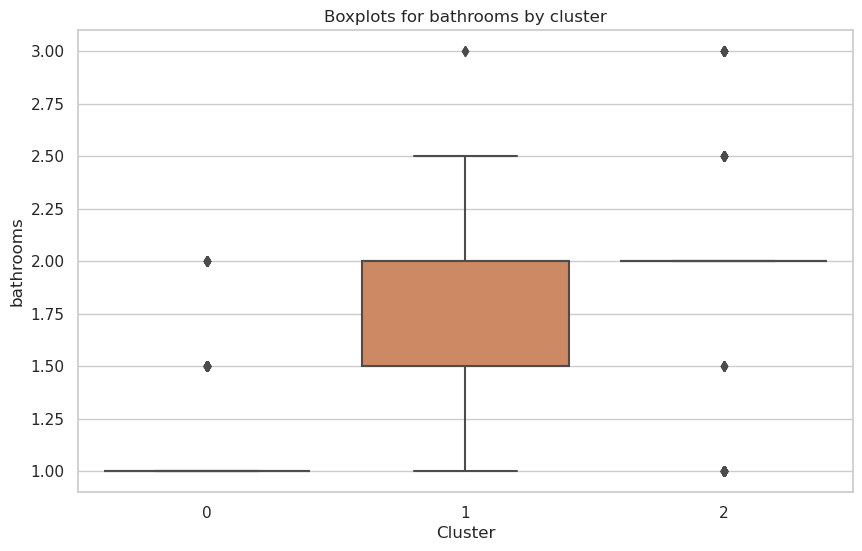

In [71]:
print("KMEANS:\n")
plot_boxplots_by_cluster(X, kmeans_labels, 'bathrooms')
print("\nHierarchical Clustering (Agglomerative Clustering):\n")
plot_boxplots_by_cluster(X, agg_labels, 'bathrooms')
print("\nDBSCAN (Density-Based Spatial Clustering of Applications with Noise):\n")
plot_boxplots_by_cluster(X, db_labels, 'bathrooms')
print("\nExpectation-Maximization (Gausian Mixture):\n")
plot_boxplots_by_cluster(X, gmm_labels, 'bathrooms')
print("\nSpectral Clustering:\n")
plot_boxplots_by_cluster(X, spectral_labels, 'bathrooms')

### Clusters Map

In [73]:
center_latitude = df_filtered['latitude'].mean()
center_longitude = df_filtered['longitude'].mean()
df_filtered['cluster'] = labels
import gmplot
gmap = gmplot.GoogleMapPlotter(center_latitude, center_longitude, zoom=10)

# Define a list of colors for 5 clusters
cluster_colors = ['blue', 'orange', 'green', 'red', 'purple']

# Iterate through your data points (latitude, longitude, cluster) in your DataFrame
for index, row in df_filtered.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    cluster_label = row['cluster']

    # Add a marker for each data point with a specific color based on the cluster
    marker_color = cluster_colors[int(cluster_label) % len(cluster_colors)]
    gmap.marker(latitude, longitude, title=f'Cluster {cluster_label}', color=marker_color)

# Create an HTML file to display the map
gmap.draw('cluster_map.html')

# Display the map in the notebook using an iframe
from IPython.display import IFrame
IFrame('cluster_map.html', width=800, height=600)

# **Conclusão e Perspectivas**

### 